In [1]:
# Basic Imports
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.metrics import mean_squared_error

# Imports for data preprocessing.
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# Tensorflow imports
import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM, BatchNormalization, Dropout
from tensorflow.keras.models import Sequential

In [2]:
# Constants
DATA_FILE_NAME = '../Data/final_crypto_data.csv'

In [3]:
df = pd.read_csv(DATA_FILE_NAME, index_col='unix_timestamp')
df

,Unnamed: 0,_id,high_24h,last_24h,bid_24h,vwap_24h,volume_24h,low_24h,ask_24h,open_24h,...,percent_change_1h,percent_change_24h,percent_change_7d,percent_change_30d,percent_change_60d,percent_change_90d,market_cap,market_cap_dominance,fully_diluted_market_cap,reddit_compound_polarity
unix_timestamp,,,,,,,,,,,,,,,,,,,,,
1635527368,0,627127fabbd592fa2c7f25a9,62971.54,62561.13,62559.74,60908.08,5113.537402,56425.0,62561.13,60608.95,...,-0.314446,2.307206,2.108769,26.873643,29.933036,49.972913,1.179682e+12,43.4826,1.313676e+12,0.000834
1635527309,1,627127fabbd592fa2c7f25aa,62971.54,62580.05,62571.40,60907.24,5111.938615,56425.0,62580.05,60608.95,...,-0.422853,2.137546,2.146984,26.873643,29.917416,49.972913,1.179209e+12,43.4826,1.313150e+12,0.000834
1635527428,2,627127fabbd592fa2c7f25ab,62971.54,62591.17,62582.19,60908.89,5115.569587,56425.0,62596.03,60608.95,...,-0.365020,2.383982,2.150485,26.873643,29.997052,49.972913,1.179605e+12,43.4826,1.313590e+12,0.000834
1635527672,3,627127fabbd592fa2c7f25ac,62971.54,62590.43,62572.06,60909.91,5117.061581,56425.0,62590.43,60608.95,...,-0.311393,2.375399,2.464668,26.873643,30.044297,49.972913,1.180352e+12,43.4826,1.314422e+12,0.000834
1635527551,4,627127fabbd592fa2c7f25ad,62971.54,62600.43,62587.09,60909.54,5117.193435,56425.0,62606.26,60608.95,...,-0.379612,2.422122,2.443523,26.873643,30.074340,49.972913,1.180216e+12,43.4826,1.314271e+12,0.000834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1651352348,246786,62712800bbd592fa2c82e9ab,38786.95,38327.07,38304.93,38539.95,566.041421,38160.4,38326.82,38599.30,...,-0.363037,-0.606400,-3.693057,-16.314320,-12.909292,1.689268,7.293839e+11,42.0516,8.050246e+11,0.000800
1651352290,246787,62712800bbd592fa2c82e9ac,38786.95,38332.23,38314.66,38539.96,566.041421,38160.4,38335.17,38599.30,...,-0.344114,-0.592877,-3.713096,-16.308426,-12.839252,1.692403,7.293371e+11,42.0489,8.049729e+11,0.000800
1651352410,246788,62712800bbd592fa2c82e9ad,38786.95,38329.94,38317.93,38539.93,566.041421,38160.4,38330.19,38599.30,...,-0.345789,-0.598362,-3.683293,-16.296175,-12.917047,1.698228,7.294364e+11,42.0546,8.050826e+11,0.000800


In [4]:
# Drop unnecessary columns
df.drop(columns=[
        'Unnamed: 0',
        '_id',
        'high_24h',
        'last_24h',
        'bid_24h',
        'vwap_24h',
        'volume_24h',
        'low_24h',
        'ask_24h',
        'open_24h',
        # 'high_1min',
        # 'volume_1min',
        # 'low_1min',
        # 'close_1min',
        # 'open_1min',
        'max_supply',
        'circulating_supply',
        'total_supply',
        'quote_USD_price',
        'quote_volume_24h',
        'volume_change_24h',
        'percent_change_1h',
        'percent_change_24h',
        'percent_change_7d',
        'percent_change_30d',
        'percent_change_60d',
        'percent_change_90d',
        'market_cap',
        'market_cap_dominance',
        'fully_diluted_market_cap',
        # 'reddit_compound_polarity'
    ], inplace=True)

df

,high_1min,volume_1min,low_1min,close_1min,open_1min,reddit_compound_polarity
unix_timestamp,,,,,,
1635527368,62565.90,1.425169,62539.20,62561.86,62545.45,0.000834
1635527309,62580.05,0.046548,62555.88,62577.47,62555.88,0.000834
1635527428,62597.65,2.112533,62555.02,62597.64,62560.95,0.000834
1635527672,62615.00,0.596406,62590.43,62590.43,62603.62,0.000834
1635527551,62600.43,0.657752,62577.18,62600.43,62577.18,0.000834
...,...,...,...,...,...,...
1651352348,38327.07,0.000650,38327.07,38327.07,38327.07,0.000800
1651352290,38332.23,0.000000,38332.23,38332.23,38332.23,0.000800
1651352410,38317.93,0.007191,38317.93,38317.93,38317.93,0.000800


In [5]:
# check for null values per column
print("NaN values per column count: \n")
df.isna().sum()

NaN values per column count: 



high_1min                   0
volume_1min                 0
low_1min                    0
close_1min                  0
open_1min                   0
reddit_compound_polarity    0
dtype: int64

In [6]:
values = df.values
# specify columns to plot
groups = [0, 1, 2, 3, 4, 5]
i = 1

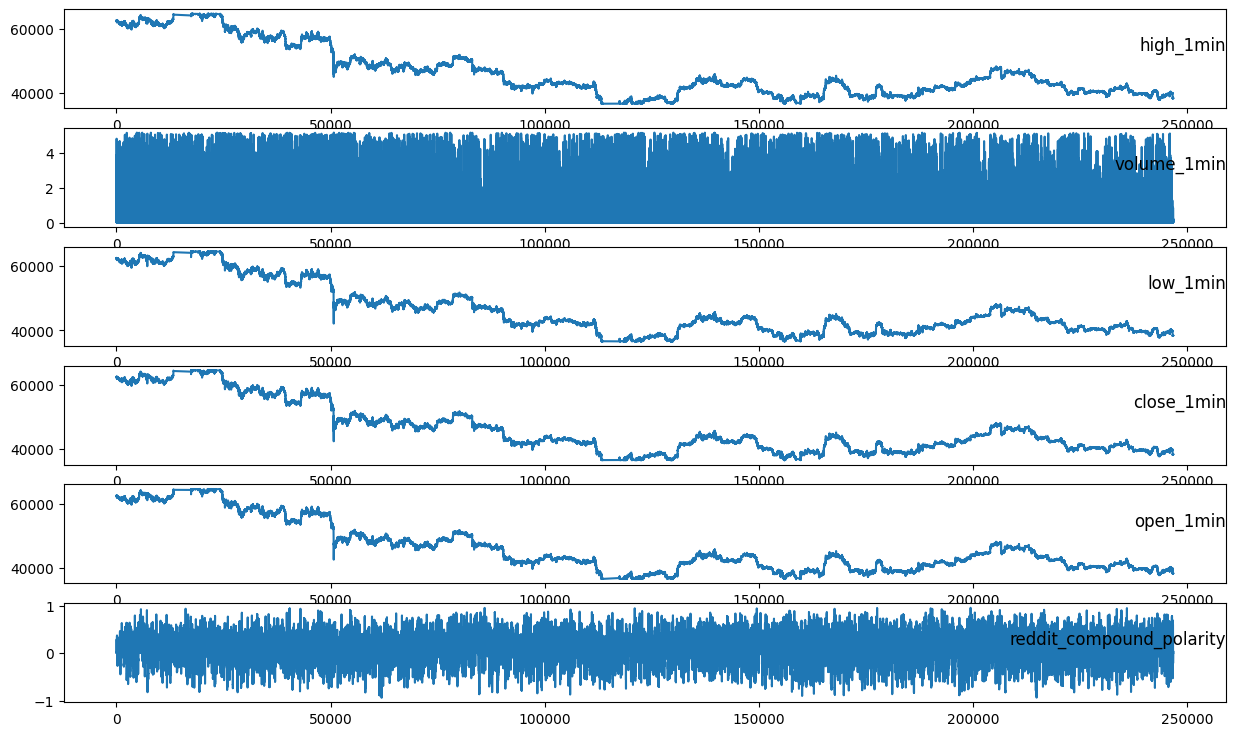

In [7]:
# plot each column
plt.figure(figsize=(15,9))
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(values[:, group])
	plt.title(df.columns[group], y=0.5, loc='right')
	i += 1
plt.show()

# LSTM Data Preparation

In [8]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True, doPrints=False):
	"""
	:param data: Ta data pou theloume na metasximatisoume se numpy Array
	:param n_in: to plithos ton Lags pou tha exei i input series (X)
	:param n_out: to plithos ton Lags pou tha exei i output series (y)
	:param dropnan: ama theloume na kanoume drop ta nan valuws
	:return: epistrefei tin metasximatismeni lista se multivariate time series.
	"""

	# vreiskei to n_vars
	# an ta data einai list = 1
	# alliws pernei to shape ton data.
	n_vars = 1 if type(data) is list else data.shape[1]

	# kanoume ta data DataFrame
	mDf = pd.DataFrame(data)
	if doPrints:
		print(mDf)

	# ftiaxnei 2 adies listes. mia fia ta
	cols, names = list(), list()
	if doPrints:
		print(n_vars)

	# ftiaxnoume to input series X. (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		# kanoume append sto cols to dataframe olistimeno kata i rows
		cols.append(mDf.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]

	# ftiaxnoume to forecast sequence y (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(mDf.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]

	if doPrints:
		print(cols)
		print(names)

	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [9]:
# get dataframe values.
values = df.values
values

array([[6.25659000e+04, 1.42516865e+00, 6.25392000e+04, 6.25618600e+04,
        6.25454500e+04, 8.33660422e-04],
       [6.25800500e+04, 4.65481700e-02, 6.25558800e+04, 6.25774700e+04,
        6.25558800e+04, 8.33660422e-04],
       [6.25976500e+04, 2.11253286e+00, 6.25550200e+04, 6.25976400e+04,
        6.25609500e+04, 8.33660422e-04],
       ...,
       [3.83179300e+04, 7.19140000e-03, 3.83179300e+04, 3.83179300e+04,
        3.83179300e+04, 8.00273973e-04],
       [3.83447900e+04, 0.00000000e+00, 3.83447900e+04, 3.83447900e+04,
        3.83447900e+04, 8.00273973e-04],
       [3.83395400e+04, 1.85617000e-01, 3.83395400e+04, 3.83395400e+04,
        3.83395400e+04, 8.00273973e-04]])

# Normalize Dataframe Values.

In [10]:
# Ensure all data are float.
values = values.astype('float32')
values

array([[6.2565898e+04, 1.4251686e+00, 6.2539199e+04, 6.2561859e+04,
        6.2545449e+04, 8.3366042e-04],
       [6.2580051e+04, 4.6548169e-02, 6.2555879e+04, 6.2577469e+04,
        6.2555879e+04, 8.3366042e-04],
       [6.2597648e+04, 2.1125329e+00, 6.2555020e+04, 6.2597641e+04,
        6.2560949e+04, 8.3366042e-04],
       ...,
       [3.8317930e+04, 7.1914000e-03, 3.8317930e+04, 3.8317930e+04,
        3.8317930e+04, 8.0027396e-04],
       [3.8344789e+04, 0.0000000e+00, 3.8344789e+04, 3.8344789e+04,
        3.8344789e+04, 8.0027396e-04],
       [3.8339539e+04, 1.8561700e-01, 3.8339539e+04, 3.8339539e+04,
        3.8339539e+04, 8.0027396e-04]], dtype=float32)

In [11]:
# Normalize Continues Features.
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_values = scaler.fit_transform(values)
scaled_values

array([[0.9250517 , 0.27705094, 0.9248632 , 0.9253454 , 0.9246783 ,
        0.4978444 ],
       [0.92555547, 0.0090489 , 0.9254569 , 0.9259012 , 0.92504954,
        0.4978444 ],
       [0.9261818 , 0.41067365, 0.92542636, 0.92661905, 0.92523   ,
        0.4978444 ],
       ...,
       [0.06199479, 0.001398  , 0.06271124, 0.06229508, 0.06228316,
        0.49782678],
       [0.06295073, 0.        , 0.0636673 , 0.06325126, 0.06323922,
        0.49782678],
       [0.06276393, 0.0360837 , 0.0634805 , 0.06306434, 0.0630523 ,
        0.49782678]], dtype=float32)

In [12]:
# prepare data for lstm
reframed = series_to_supervised(scaled_values, n_in=1,n_out=1)
reframed

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t)
1,0.925052,0.277051,0.924863,0.925345,0.924678,0.497844,0.925555,0.009049,0.925457,0.925901,0.925050,0.497844
2,0.925555,0.009049,0.925457,0.925901,0.925050,0.497844,0.926182,0.410674,0.925426,0.926619,0.925230,0.497844
3,0.926182,0.410674,0.925426,0.926619,0.925230,0.497844,0.926800,0.115941,0.926687,0.926363,0.926749,0.497845
4,0.926800,0.115941,0.926687,0.926363,0.926749,0.497845,0.926281,0.127866,0.926215,0.926718,0.925808,0.497845
5,0.926281,0.127866,0.926215,0.926718,0.925808,0.497845,0.926382,0.201259,0.926892,0.926605,0.926537,0.497845
...,...,...,...,...,...,...,...,...,...,...,...,...
246786,0.062229,0.000128,0.062945,0.062529,0.062517,0.497827,0.062320,0.000126,0.063037,0.062620,0.062608,0.497827
246787,0.062320,0.000126,0.063037,0.062620,0.062608,0.497827,0.062504,0.000000,0.063220,0.062804,0.062792,0.497827
246788,0.062504,0.000000,0.063220,0.062804,0.062792,0.497827,0.061995,0.001398,0.062711,0.062295,0.062283,0.497827
246789,0.061995,0.001398,0.062711,0.062295,0.062283,0.497827,0.062951,0.000000,0.063667,0.063251,0.063239,0.497827


In [13]:
# drop columns we don't want to predict
# we only want to predict close_1min value based on previous minute values.
# so we drop var1,var2,var4,var5,var6(t) columns
reframed.drop(
	columns = [
		"var1(t)",
		'var2(t)',
		'var3(t)',
		'var5(t)',
		'var6(t)',
	],
	axis=1,
	inplace=True
)
reframed.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var4(t)
1,0.925052,0.277051,0.924863,0.925345,0.924678,0.497844,0.925901
2,0.925555,0.009049,0.925457,0.925901,0.925050,0.497844,0.926619
3,0.926182,0.410674,0.925426,0.926619,0.925230,0.497844,0.926363
4,0.926800,0.115941,0.926687,0.926363,0.926749,0.497845,0.926718
5,0.926281,0.127866,0.926215,0.926718,0.925808,0.497845,0.926605


# Define And Fit Model

In [14]:
def train_test_valid_split(total_x, total_y, train_size=0.8, valid_size=0.1) :
    train_index = int(len(total_x) * train_size)
    valid_index = int(len(total_x) * valid_size)

    X_train, y_train = total_x[0 :train_index], total_y[0 :train_index]
    X_valid, y_valid = total_x[train_index :train_index + valid_index], total_y[train_index :train_index + valid_index]
    X_test, y_test = total_x[train_index + valid_index :], total_y[train_index + valid_index :]

    print("-------- train test valid split --------")
    print(len(X_train)), print(len(y_train))
    print(len(X_valid)), print(len(y_valid))
    print(len(X_test)), print(len(y_test))
    print("----------------------------------------")

    return np.array(X_train), \
           np.array(y_train), \
           np.array(X_valid), \
           np.array(y_valid), \
           np.array(X_test), \
           np.array(y_test)

In [15]:
# split into train and test sets
values = reframed.values
cutoff = round(0.90 * len(values))
values = values[cutoff:,:]
values

array([[0.11109769, 0.        , 0.11181688, ..., 0.11138988, 0.420296  ,
        0.1118629 ],
       [0.11155474, 0.        , 0.11227393, ..., 0.11184692, 0.4868027 ,
        0.11364651],
       [0.11333799, 0.42650875, 0.11261773, ..., 0.1121912 , 0.420296  ,
        0.11550331],
       ...,
       [0.0625037 , 0.        , 0.06322026, ..., 0.06279218, 0.49782678,
        0.06229508],
       [0.06199479, 0.001398  , 0.06271124, ..., 0.06228316, 0.49782678,
        0.06325126],
       [0.06295073, 0.        , 0.0636673 , ..., 0.06323922, 0.49782678,
        0.06306434]], dtype=float32)

In [16]:
X =  values[:,:-1]
X

array([[0.11109769, 0.        , 0.11181688, 0.11140585, 0.11138988,
        0.420296  ],
       [0.11155474, 0.        , 0.11227393, 0.1118629 , 0.11184692,
        0.4868027 ],
       [0.11333799, 0.42650875, 0.11261773, 0.11364651, 0.1121912 ,
        0.420296  ],
       ...,
       [0.0625037 , 0.        , 0.06322026, 0.0628041 , 0.06279218,
        0.49782678],
       [0.06199479, 0.001398  , 0.06271124, 0.06229508, 0.06228316,
        0.49782678],
       [0.06295073, 0.        , 0.0636673 , 0.06325126, 0.06323922,
        0.49782678]], dtype=float32)

In [17]:
y = values[:,-1]
y

array([0.1118629 , 0.11364651, 0.11550331, ..., 0.06229508, 0.06325126,
       0.06306434], dtype=float32)

In [18]:
train_X, train_y, valid_X, valid_y, _, _ = train_test_valid_split(
	X,
	y,
	train_size=0.8,
	valid_size=0.1
)
print("----------------------------")
print(f"-------- Train X: {train_X.shape}, Train y: {train_y.shape} --------")
print(f"-------- Valid X: {valid_X.shape}, Valid y: {valid_y.shape} --------")
# print(f"-------- Test X: {test_X.shape}, Test y: {test_y.shape} --------")
print("----------------------------\n")

-------- train test valid split --------
19743
19743
2467
2467
2469
2469
----------------------------------------
----------------------------
-------- Train X: (19743, 6), Train y: (19743,) --------
-------- Valid X: (2467, 6), Valid y: (2467,) --------
----------------------------



In [19]:
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
valid_X = valid_X.reshape((valid_X.shape[0], 1, valid_X.shape[1]))
print(train_X.shape, train_y.shape, valid_X.shape, valid_y.shape)

(19743, 1, 6) (19743,) (2467, 1, 6) (2467,)


In [20]:
 # Network Configurations
EPOCHS = 100
BATCH_SIZE = 32

In [21]:
# design network
model = Sequential()
model.add(LSTM(
	2 * BATCH_SIZE,
	return_sequences=True,
	activation='relu',
	# unroll=True,
	input_shape=(train_X.shape[1], train_X.shape[2]),
))
model.add(LSTM(
	BATCH_SIZE,
	activation='relu',
	# unroll=True,
))
# model.add(Dense(BATCH_SIZE))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='mse')

2022-09-25 19:32:03.322319: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [22]:
# fit network
history = model.fit(
	train_X,
	train_y,
	epochs=EPOCHS,
	batch_size=BATCH_SIZE,
	validation_data=(valid_X, valid_y),
	verbose=2,
	shuffle=False
)

2022-09-25 19:32:03.543034: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
617/617 - 4s - loss: 0.0160 - val_loss: 0.0041
Epoch 2/100
617/617 - 1s - loss: 9.1491e-04 - val_loss: 0.0041
Epoch 3/100
617/617 - 1s - loss: 6.3381e-04 - val_loss: 0.0037
Epoch 4/100
617/617 - 1s - loss: 5.4116e-04 - val_loss: 0.0034
Epoch 5/100
617/617 - 1s - loss: 4.5681e-04 - val_loss: 0.0031
Epoch 6/100
617/617 - 1s - loss: 3.9291e-04 - val_loss: 0.0028
Epoch 7/100
617/617 - 1s - loss: 3.4095e-04 - val_loss: 0.0025
Epoch 8/100
617/617 - 1s - loss: 2.9881e-04 - val_loss: 0.0023
Epoch 9/100
617/617 - 1s - loss: 2.6440e-04 - val_loss: 0.0021
Epoch 10/100
617/617 - 1s - loss: 2.3617e-04 - val_loss: 0.0019
Epoch 11/100
617/617 - 1s - loss: 2.1274e-04 - val_loss: 0.0018
Epoch 12/100
617/617 - 1s - loss: 1.9318e-04 - val_loss: 0.0016
Epoch 13/100
617/617 - 1s - loss: 1.7673e-04 - val_loss: 0.0015
Epoch 14/100
617/617 - 1s - loss: 1.6276e-04 - val_loss: 0.0014
Epoch 15/100
617/617 - 1s - loss: 1.5044e-04 - val_loss: 0.0013
Epoch 16/100
617/617 - 1s - loss: 1.4031e-04 - val_lo

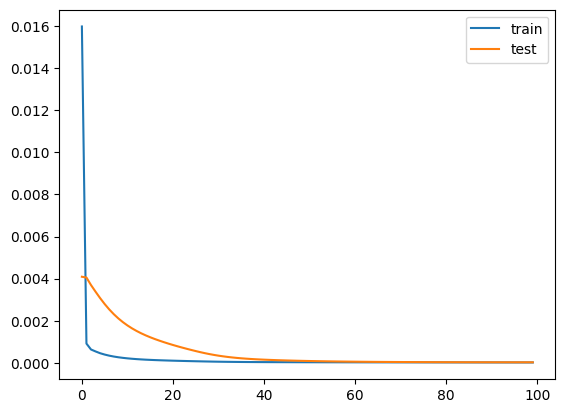

In [23]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [24]:
# make a prediction
yhat = model.predict(valid_X)
valid_X = valid_X.reshape((valid_X.shape[0], valid_X.shape[2]))

In [25]:
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, valid_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

In [26]:
# invert scaling for actual
test_y = valid_y.reshape((len(valid_y), 1))
inv_y = np.concatenate((test_y, valid_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

In [27]:
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 142.163
